In [267]:
import numpy as np
data = np.loadtxt('hw1q1datanoise.txt')

#### use Hierarchical Clustering

In [268]:
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Heiti TC'  # 或 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False   # 解決負號顯示成方框

In [269]:
linked = linkage(data , method = 'ward') 

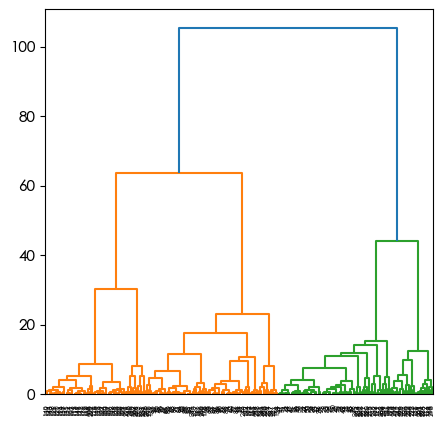

In [270]:
plt.figure(figsize=(5, 5))
_ = dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.show()

* orginal plot

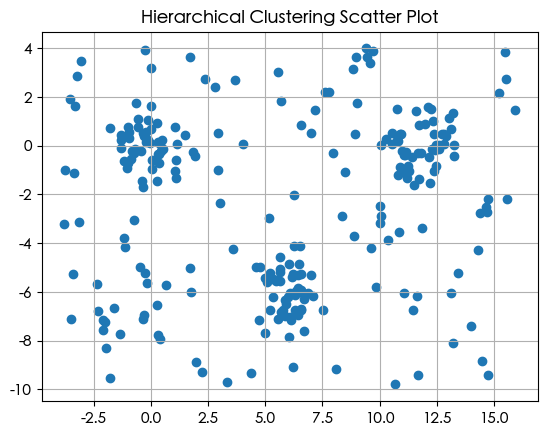

In [271]:
plt.scatter(data[:,0] , data[:,1])
plt.title('Hierarchical Clustering Scatter Plot')
plt.grid(True)
plt.show()

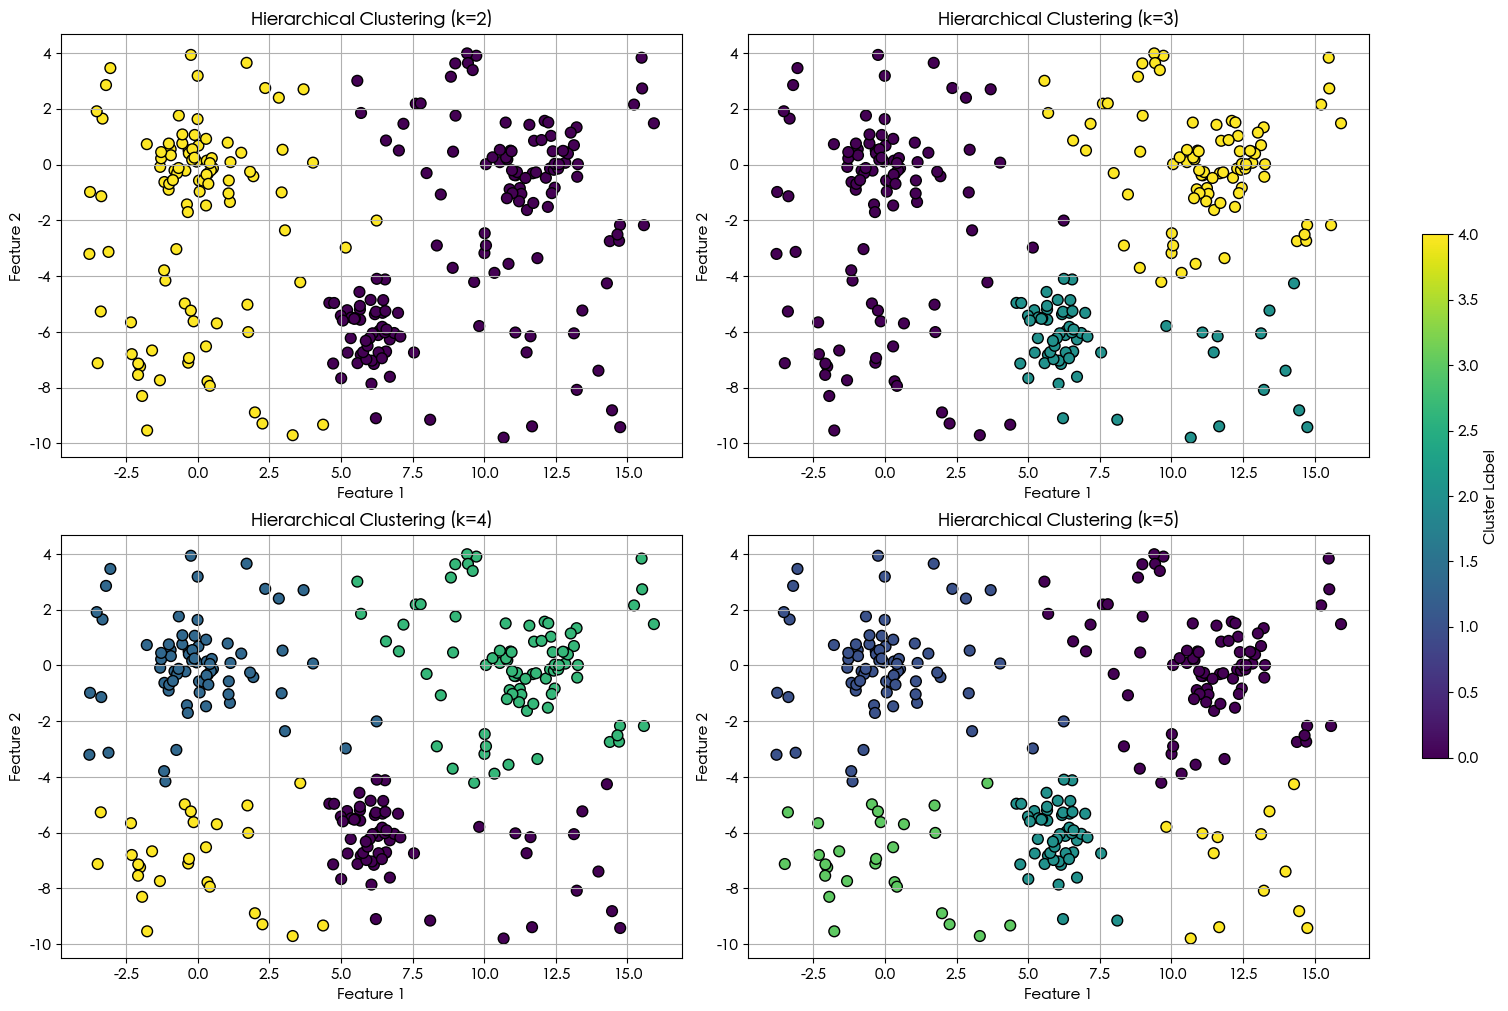

In [272]:
fig,axes = plt.subplots(2,2 , figsize = (15 , 10) ,constrained_layout=True)
axes = axes.ravel()

for i , num in enumerate([2,3,4,5]):
    hc = AgglomerativeClustering(n_clusters=num , linkage= 'ward')
    cluster_label = hc.fit_predict(data)

    sc = axes[i].scatter(
        data[:, 0],
        data[:, 1],
        c=cluster_label,
        cmap='viridis',
        s=60,
        edgecolors='k'
    )

    axes[i].set_title(f'Hierarchical Clustering (k={num})')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].grid(True)

# 增加共用 colorbar（根據最後一張）
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='Cluster Label')
plt.show()

- 這感覺效果沒有很好，應該比較適合DBSCAN因為有比較重的區域和離散區

<hr>

#### K-means

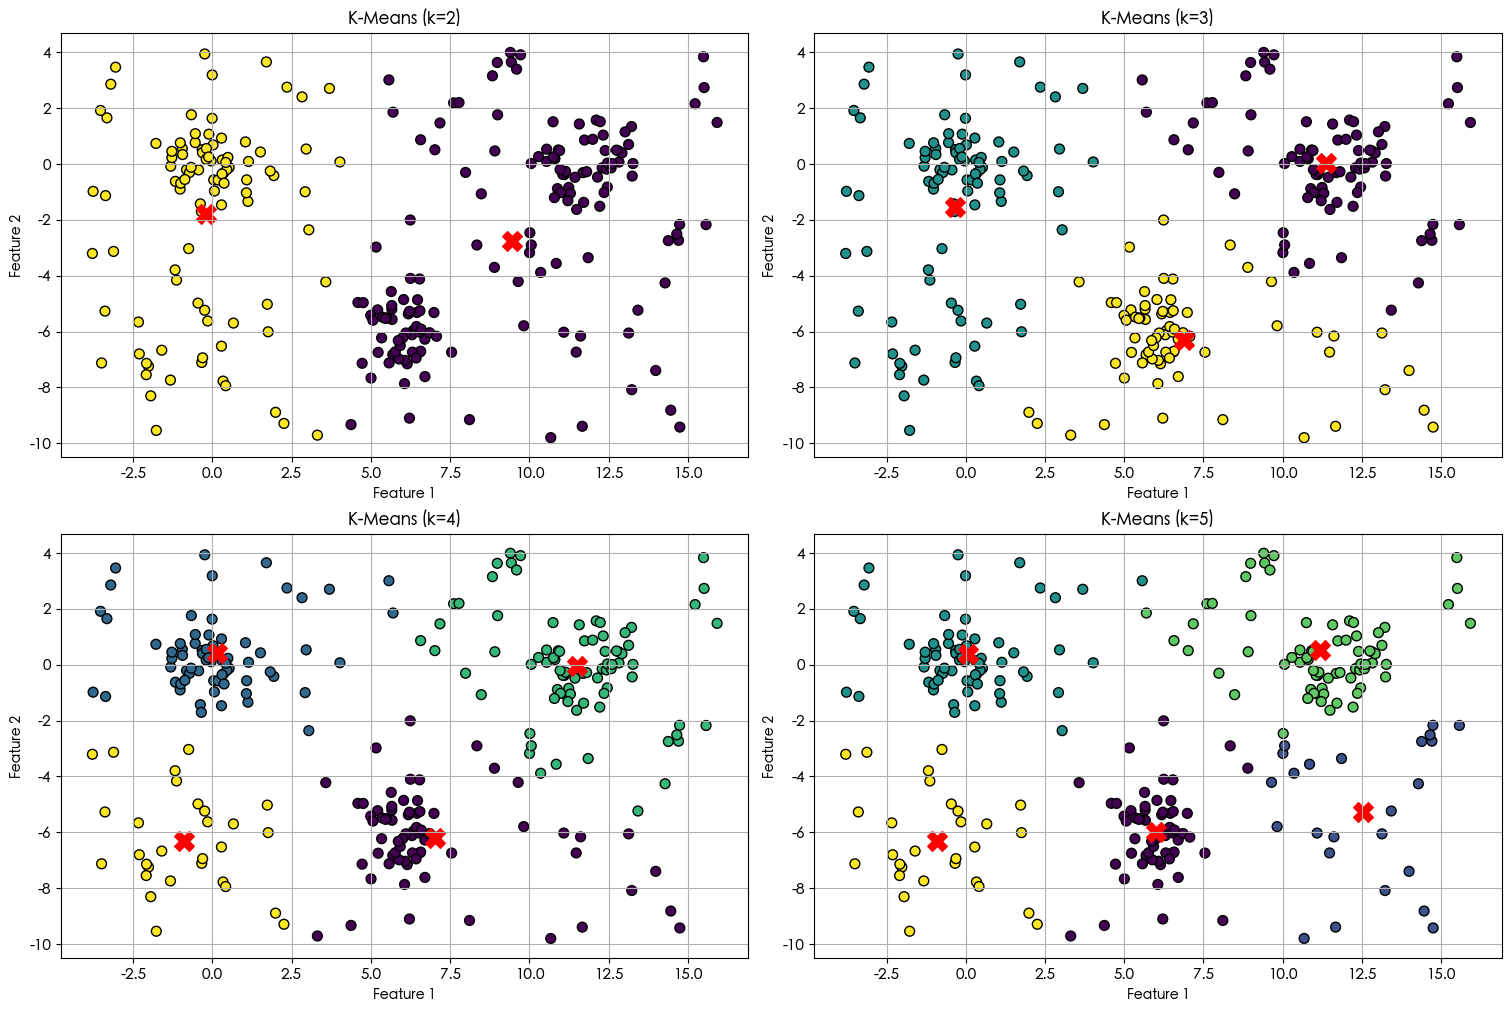

In [273]:
from sklearn.cluster import KMeans

fig,axes = plt.subplots(2,2 , figsize = (15 , 10) ,constrained_layout=True)
axes = axes.ravel()
# 設定要測試的 k 值
k_values = [2, 3, 4, 5]

for i, k in enumerate(k_values):
    # 建立並訓練 KMeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data)

    # 取得標籤與中心點
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # 畫散點圖
    sc = axes[i].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')
    axes[i].scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')

    # 標題與標籤
    axes[i].set_title(f'K-Means (k={k})', fontsize=12)
    axes[i].set_xlabel('Feature 1', fontsize=10)
    axes[i].set_ylabel('Feature 2', fontsize=10)
    axes[i].grid(True)

# 讓排版自動調整
plt.show()


In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

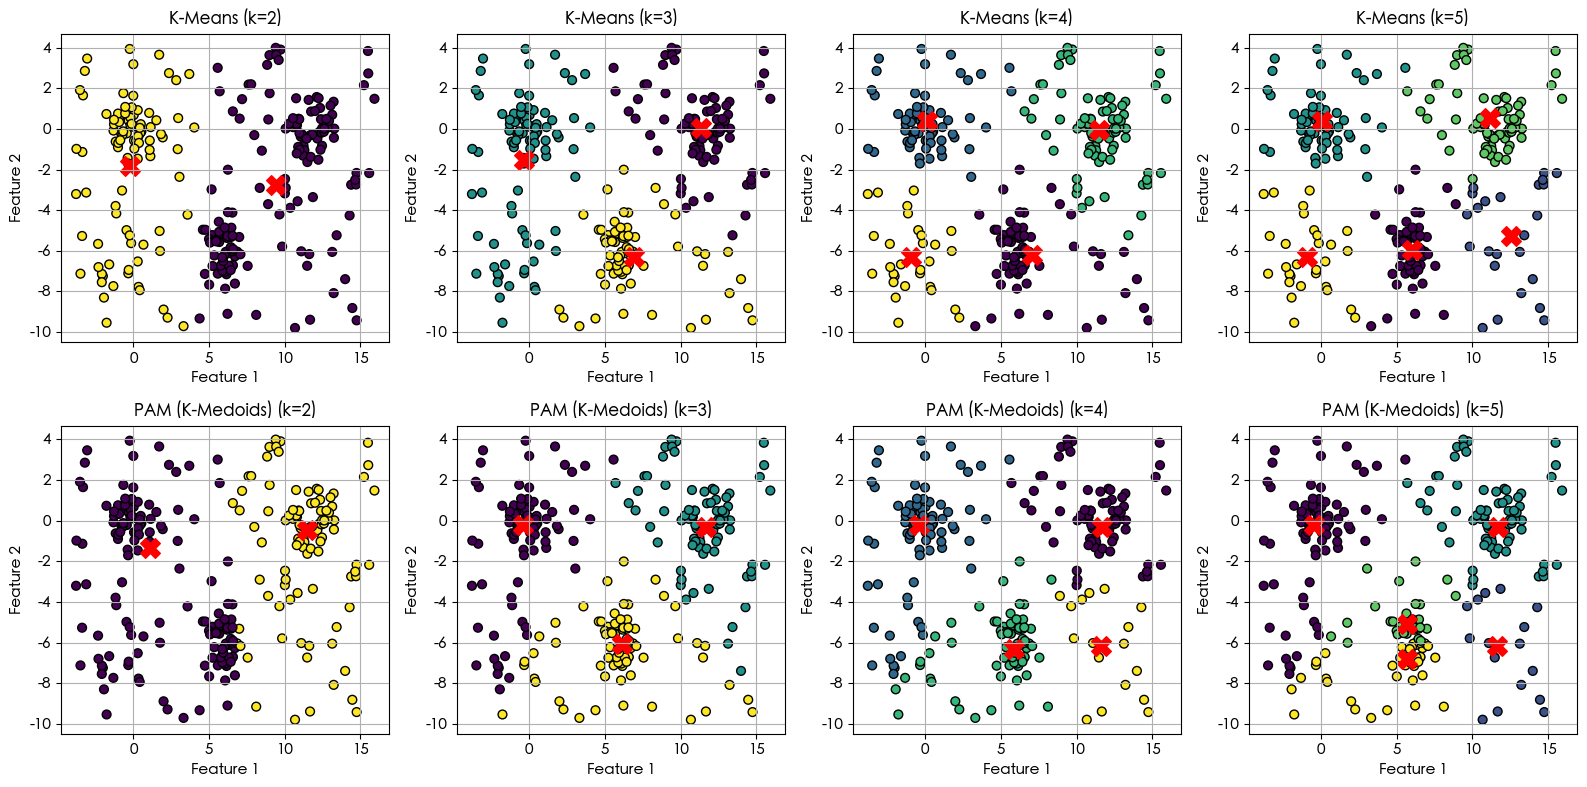

In [275]:
# 建立 2 列 × 4 欄 子圖：左側 K-Means 右側 PAM
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# --- 🎨 畫 K-Means ---
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    axes[i].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k')
    axes[i].scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
    axes[i].set_title(f'K-Means (k={k})', fontsize=12)
    axes[i].set_xlabel('Feature 1'); axes[i].set_ylabel('Feature 2'); axes[i].grid(True)

# --- 🎨 畫 PAM (K-Medoids) ---
for i, k in enumerate(k_values):
    kmedoids = KMedoids(n_clusters=k, random_state=0, metric='euclidean')
    kmedoids.fit(data)
    labels = kmedoids.labels_
    medoids = kmedoids.cluster_centers_

    axes[i + 4].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k')
    axes[i + 4].scatter(medoids[:, 0], medoids[:, 1], marker='X', s=200, c='red')
    axes[i + 4].set_title(f'PAM (K-Medoids) (k={k})', fontsize=12)
    axes[i + 4].set_xlabel('Feature 1'); axes[i + 4].set_ylabel('Feature 2'); axes[i + 4].grid(True)

# --- 📊 排版 ---
plt.tight_layout()
plt.show()

- 感覺這種資料k-means or k-medoids效果都還可以
- 感覺應該用k = 3效果最好

#### DBSCAN

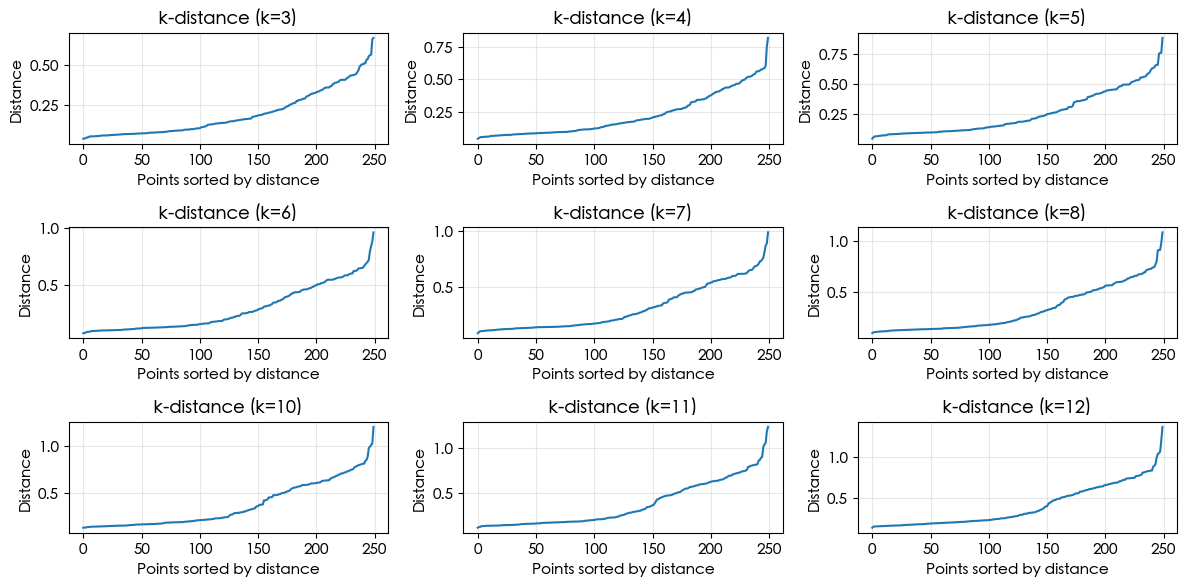

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import math
from sklearn.preprocessing import StandardScaler

# 你已有的資料矩陣：data (np.array 或 pd.DataFrame.values)
# 例如：data = df[['x','y']].values
data = StandardScaler().fit_transform(data)
ks = [3, 4, 5, 6, 7, 8 , 10 , 11 , 12]

# 排版：每列 3 張子圖
ncols = 3
nrows = math.ceil(len(ks) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6), squeeze=False)
axes = axes.ravel()

for idx, k in enumerate(ks):
    # 排除自己：設 n_neighbors=k+1，取第 k 個距離（0 是自己，1..k 是前 k 個鄰居）
    nbrs = NearestNeighbors(n_neighbors=k+1)
    nbrs.fit(data)
    distances, indices = nbrs.kneighbors(data)

    k_dist = distances[:, k]          # 到第 k 近鄰的距離
    k_dist_sorted = np.sort(k_dist)   # 排序後畫 elbow

    ax = axes[idx]
    ax.plot(k_dist_sorted)
    ax.set_title(f'k-distance (k={k})')
    ax.set_xlabel('Points sorted by distance')
    ax.set_ylabel('Distance')
    ax.grid(True, alpha=0.3)

# 把多餘的子圖框去掉
for j in range(len(ks), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- 雖然這邊看不同的k
- 假設要用k = 6
- 所以要用2左右

In [277]:
import numpy as np
data = np.loadtxt('hw1q1datanoise.txt')

In [278]:
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(data)

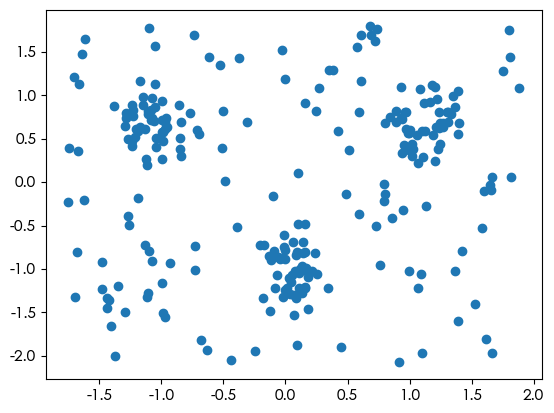

In [279]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [280]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 96


- 這個結果感覺挺不錯的
- 主要是這個資料好看出來

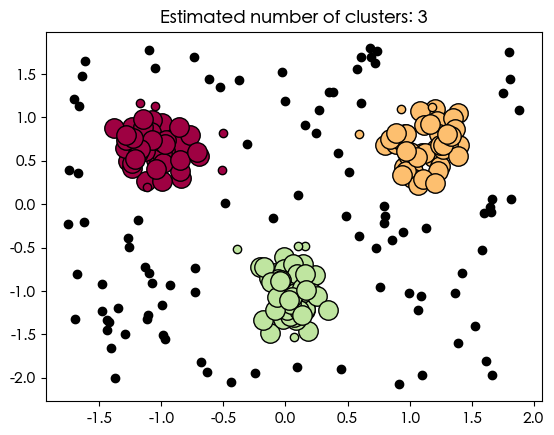

In [281]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

- 這邊會有標準化是因為標準化後感覺比較準 不用比較難抓
<hr>

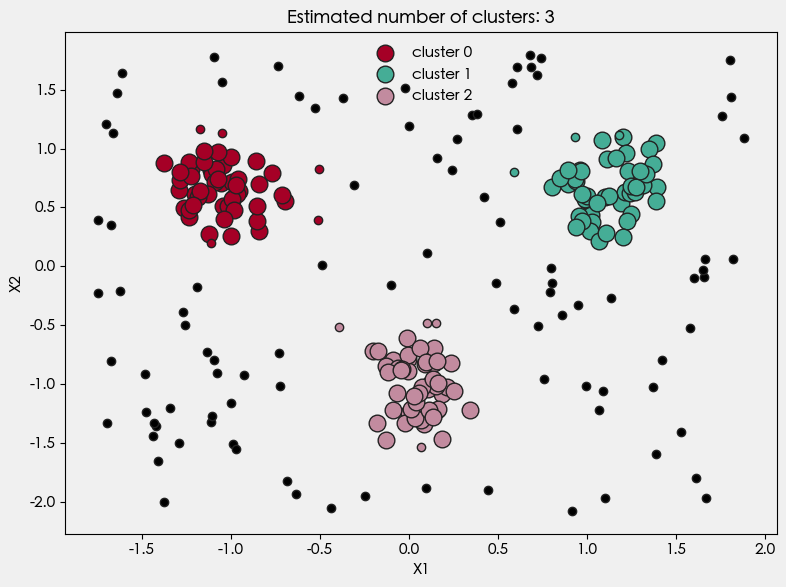

In [282]:
import itertools
import matplotlib.pyplot as plt

# 你的色盤（分類用，群數>4 會循環）
QUAL_PALETTE = ["#A50026", "#45AD96", "#C28B9F", "#6A8E9A"]  # Crimson, Teal, Dusty Rose, Slate Blue
BG = "#F0F0F0"

# 先把標籤排序，雜訊(-1)留到最後處理
ordered_labels = sorted([l for l in set(labels) if l != -1])
color_cycle = itertools.cycle(QUAL_PALETTE)
label_to_color = {k: next(color_cycle) for k in ordered_labels}

plt.figure(figsize=(8, 6), facecolor=BG)
ax = plt.gca()
ax.set_facecolor(BG)

# 核心點與邊界點樣式
core_ms, border_ms = 12, 6
edgecolor = "#222222"

# 畫非雜訊群
for k in ordered_labels:
    col = label_to_color[k]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=col, markeredgecolor=edgecolor, markersize=core_ms,
        linewidth=0.5, label=f"cluster {k}"
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=col, markeredgecolor=edgecolor, markersize=border_ms,
        linewidth=0.5
    )

# 畫雜訊
if -1 in set(labels):
    noise_mask = (labels == -1)
    xy = X[noise_mask & core_samples_mask]
    if xy.size:
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor="#000000", markeredgecolor=edgecolor, markersize=core_ms,
            linewidth=0.5, label="noise"
        )
    xy = X[noise_mask & ~core_samples_mask]
    if xy.size:
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor="#000000", markeredgecolor=edgecolor, markersize=border_ms,
            linewidth=0.5
        )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(frameon=False, loc="best")
plt.tight_layout()
plt.show()


### 接下來的過程我就直接把它寫成套件用進來

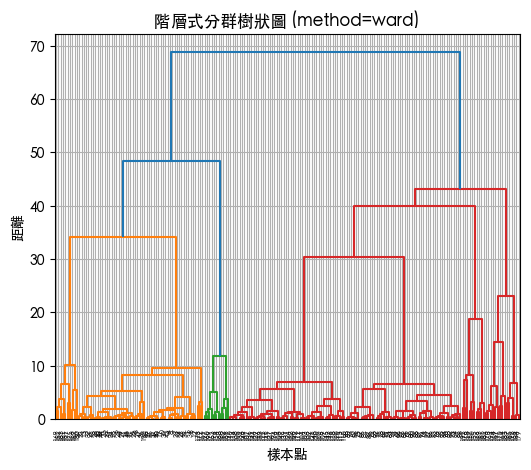

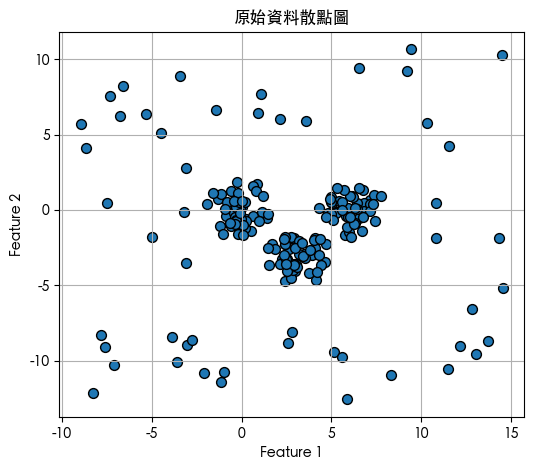

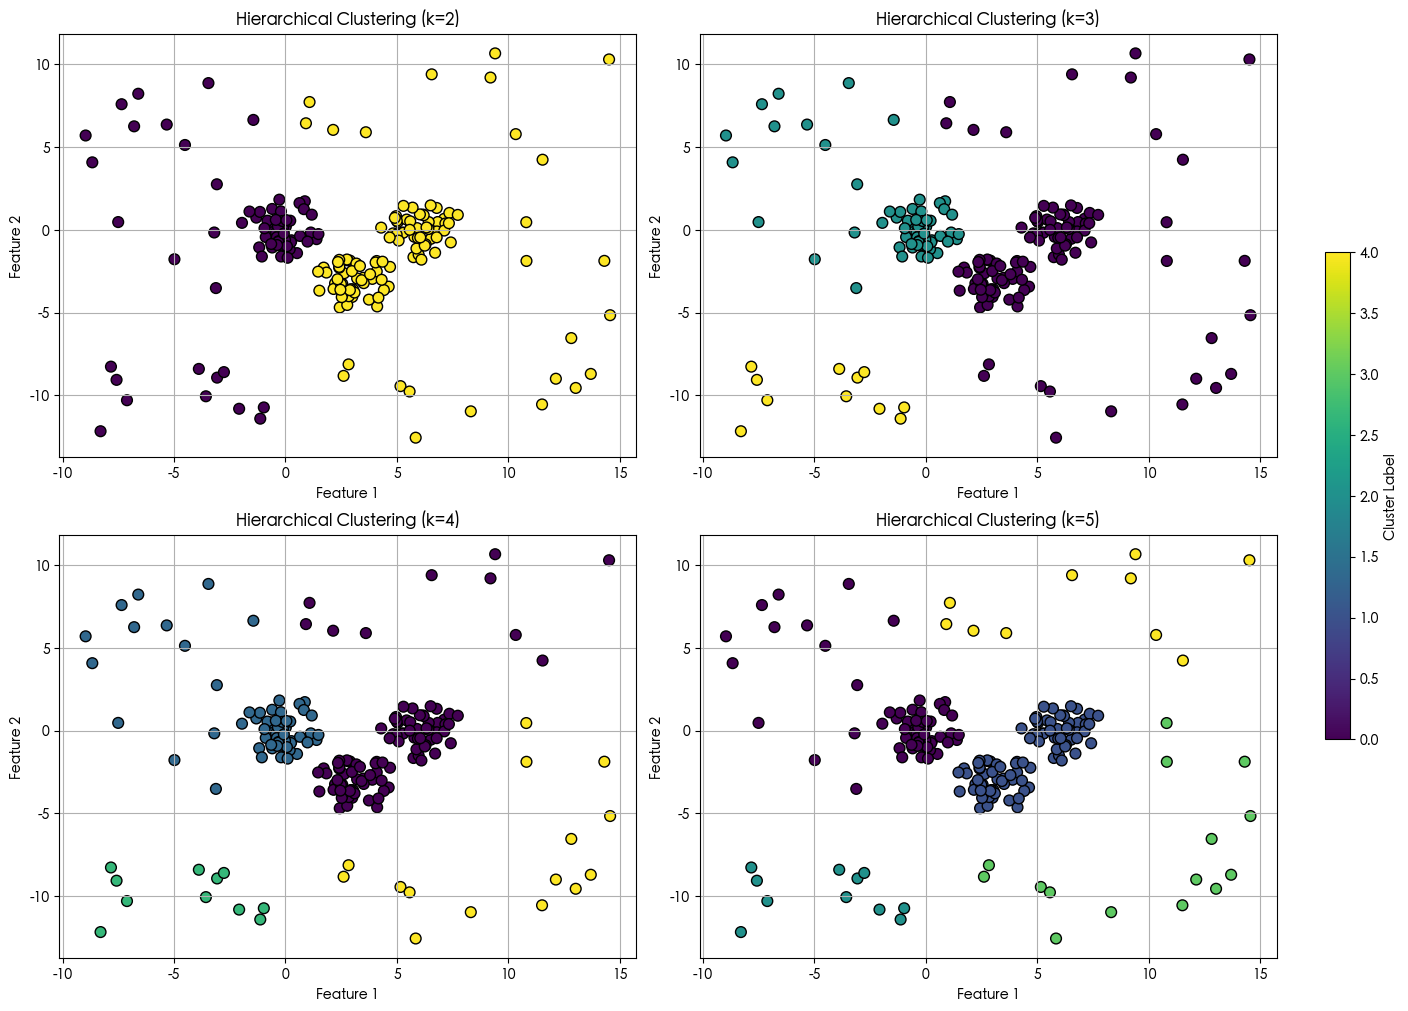

In [94]:
import main_def,importlib
importlib.reload(main_def)
import numpy as np
data = np.loadtxt('hw1q1dataoutlier.txt')
main_def.plot_hierarchical_clustering(data)

- 可以發現效果不好 因為他是用距離很難發現差別 這幾個有點近

<hr>

##### k-menas

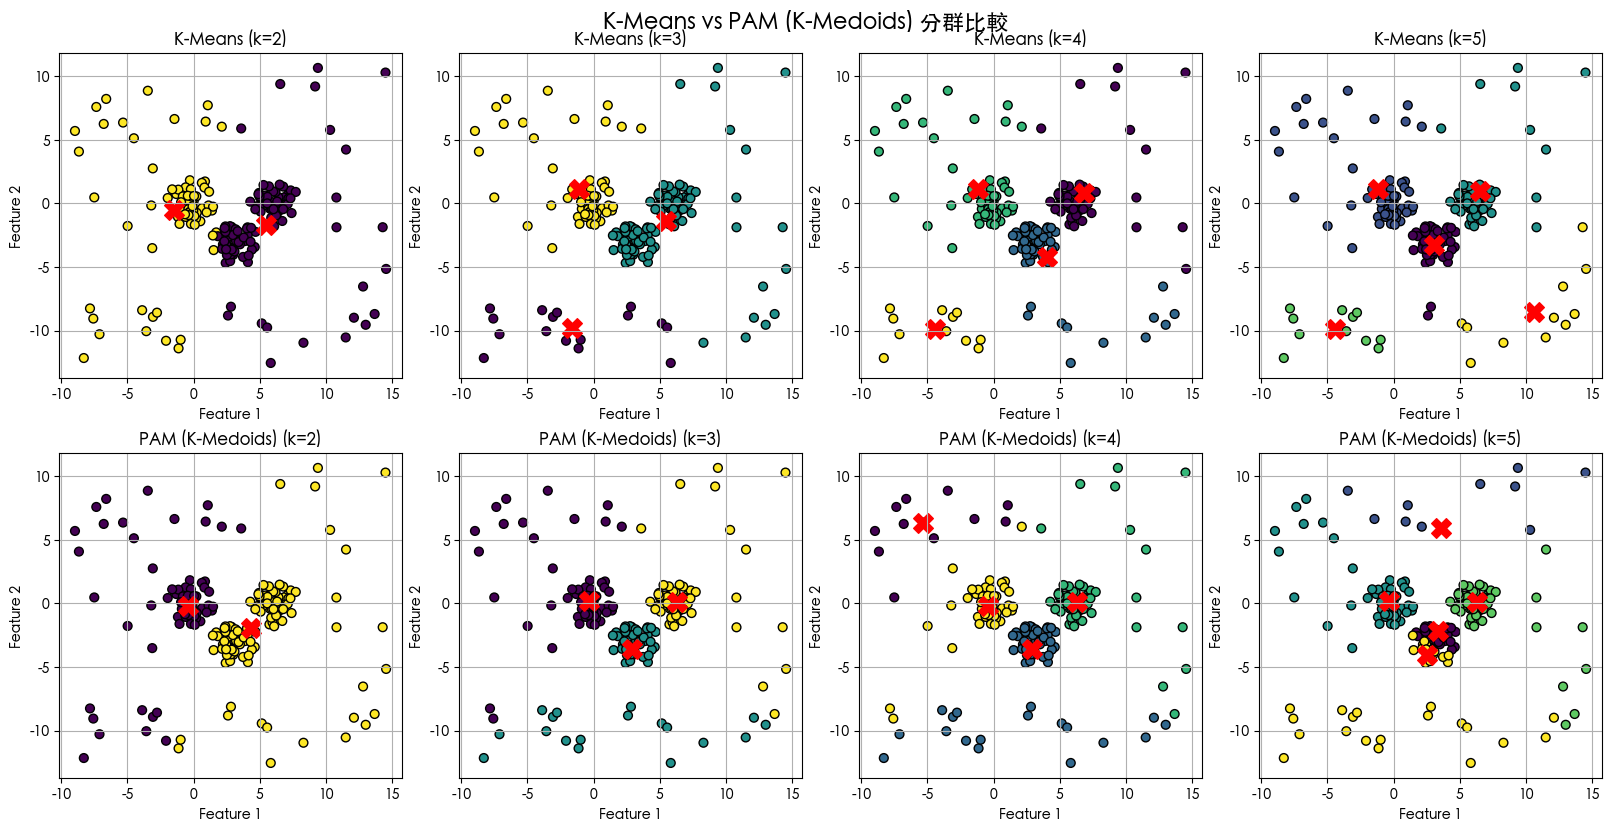

In [95]:
main_def.compare_kmeans_pam(data)

- PAM k = 3效果是好的 因為他是從樣本點出發
- 感覺k mean調整一下應該也還可以

<hr>

Estimated number of clusters: 3
Estimated number of noise points: 51


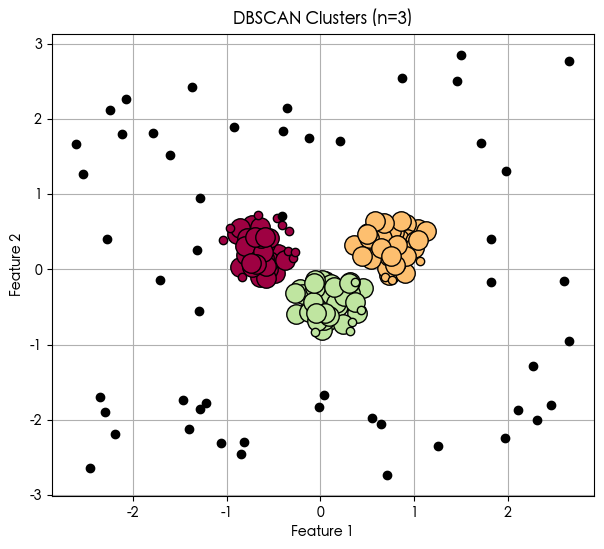

In [103]:
# 假設你已經有 data (numpy array)
db, labels, X = main_def.run_dbscan(data, eps=0.25, min_samples=8)
main_def.plot_dbscan_clusters(db, labels, X)


- 這樣感覺也還不錯 這個density蠻好看出來的

<hr>
<hr>

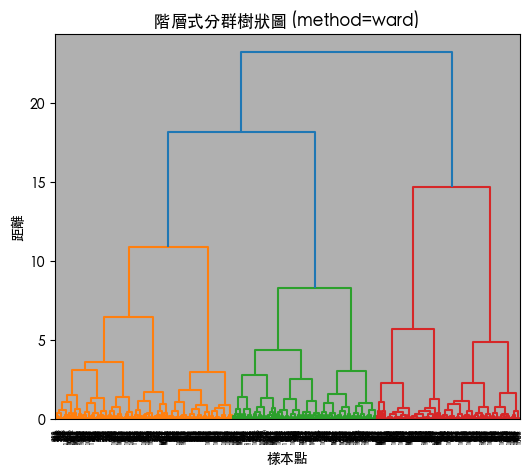

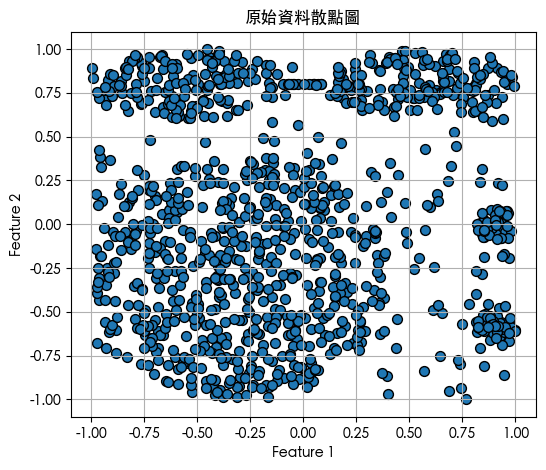

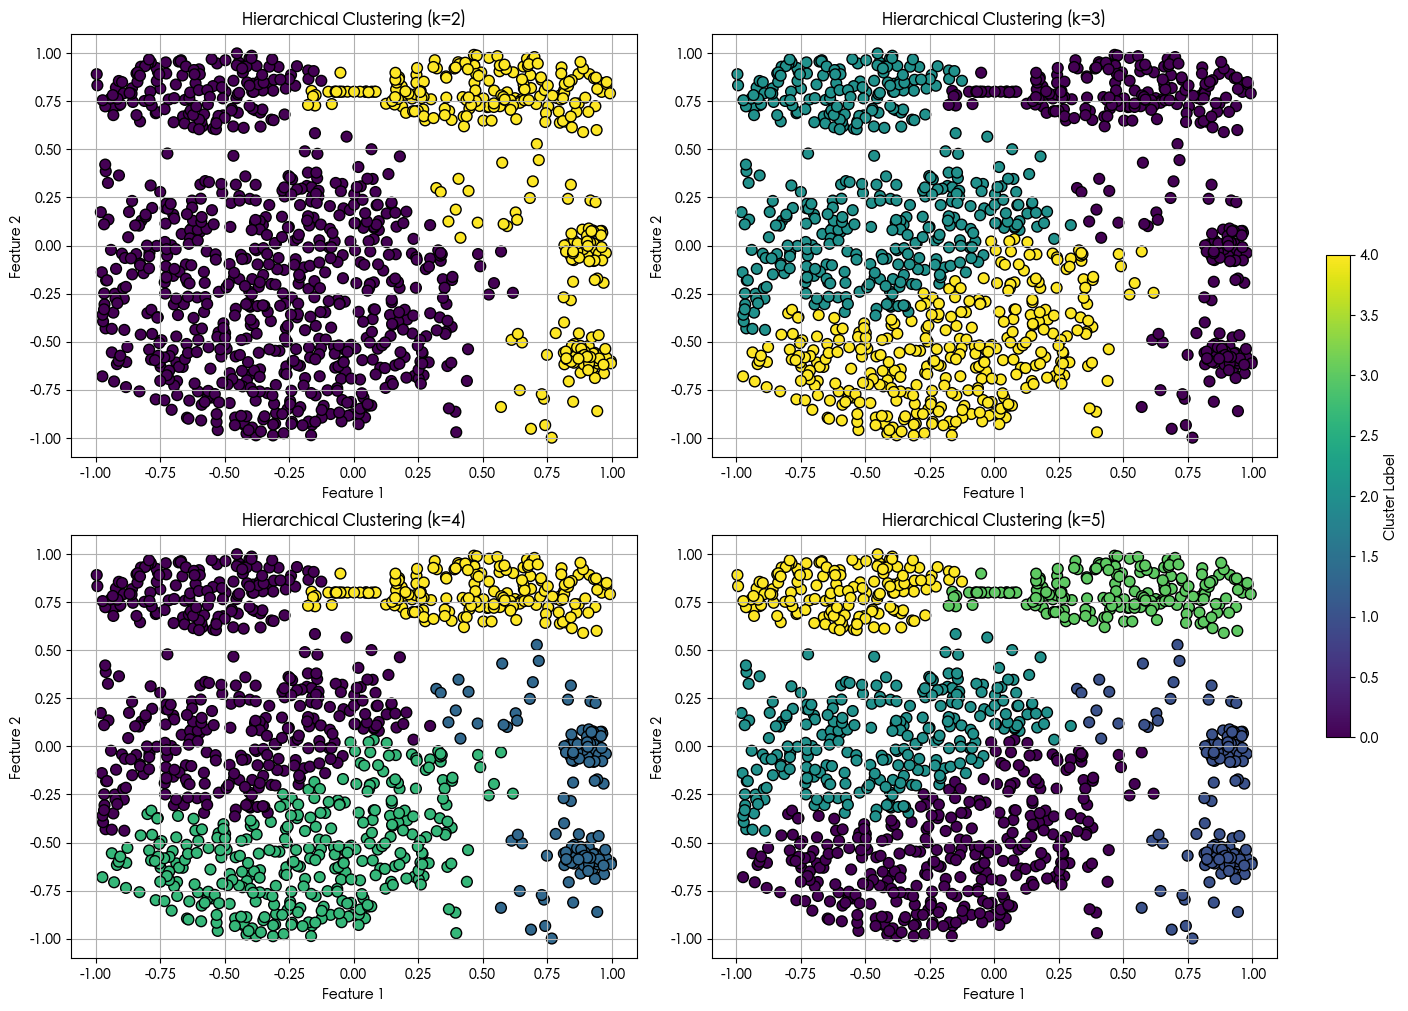

In [119]:
import main_def,importlib
importlib.reload(main_def)
import numpy as np
data = np.loadtxt('hw1q1datashape.txt')
main_def.plot_hierarchical_clustering(data)

- 感覺不太像k=2下半部感覺是對的 但其他是錯的
- 其他則是相反

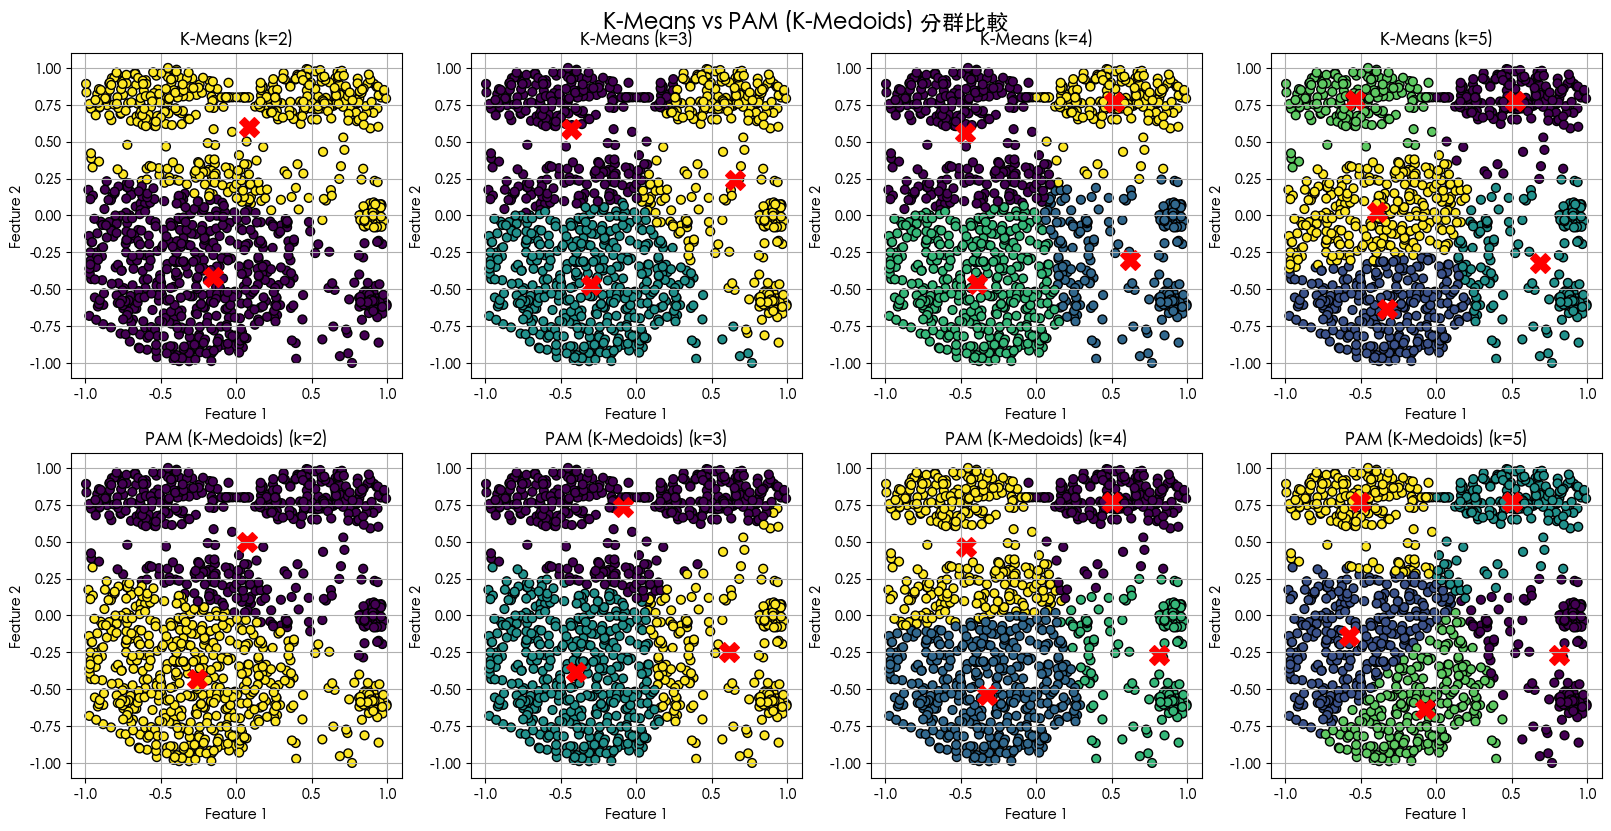

In [120]:
main_def.compare_kmeans_pam(data)

- 感覺也沒有到很對
- 但是感覺PAM k = 3感覺還行 但下面差了一點

Estimated number of clusters: 4
Estimated number of noise points: 15


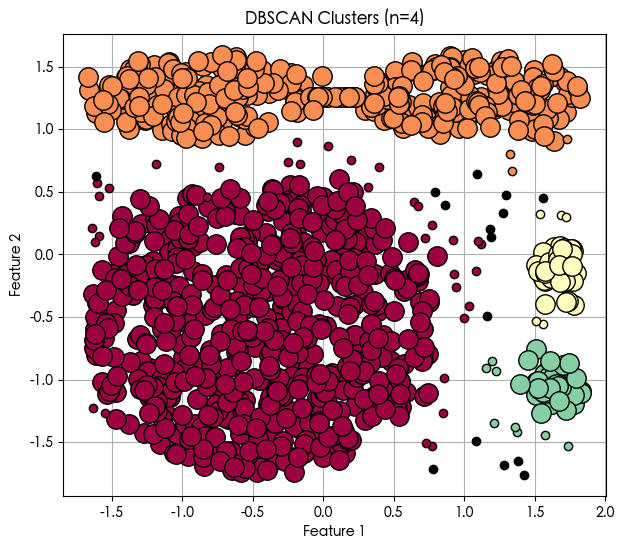

In [136]:
db, labels, X = main_def.run_dbscan(data, eps=0.35, min_samples=20)
main_def.plot_dbscan_clusters(db, labels, X)


- 這感覺效果就還不錯

<hr>
<hr>

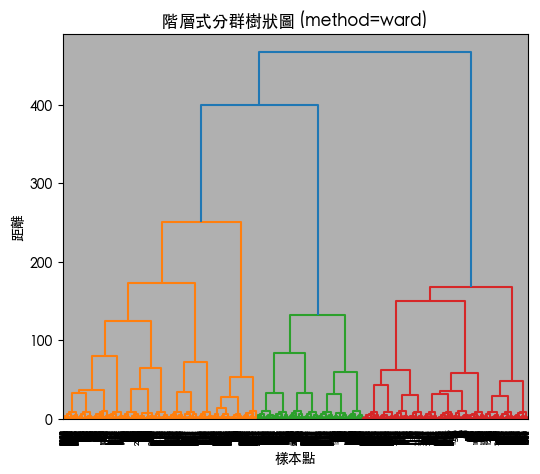

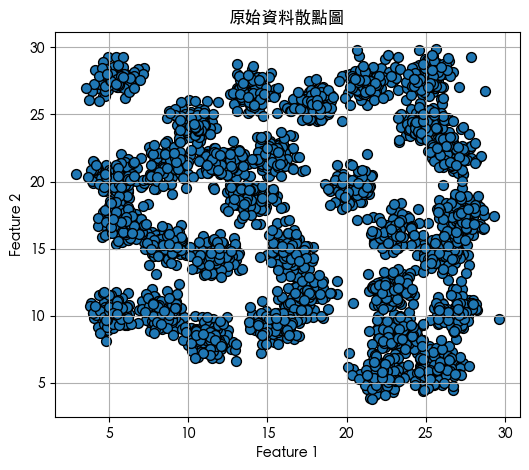

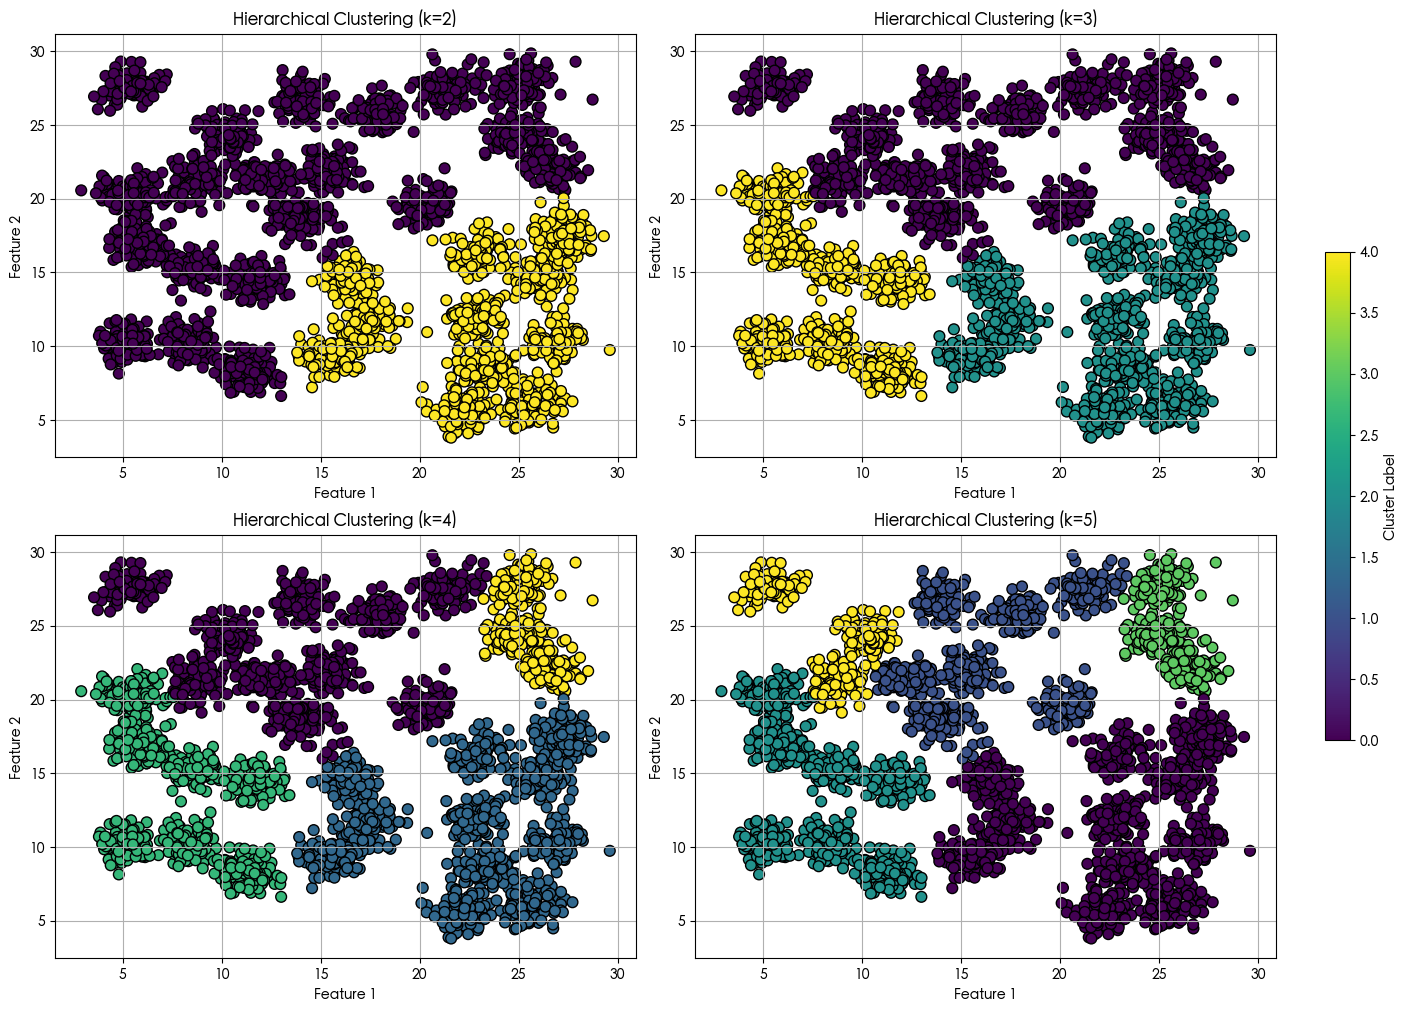

In [159]:
import main_def,importlib
importlib.reload(main_def)
import numpy as np
data = np.loadtxt('hw1q1data31grp (1).txt')
main_def.plot_hierarchical_clustering(data)

- 這效果感覺沒有很好

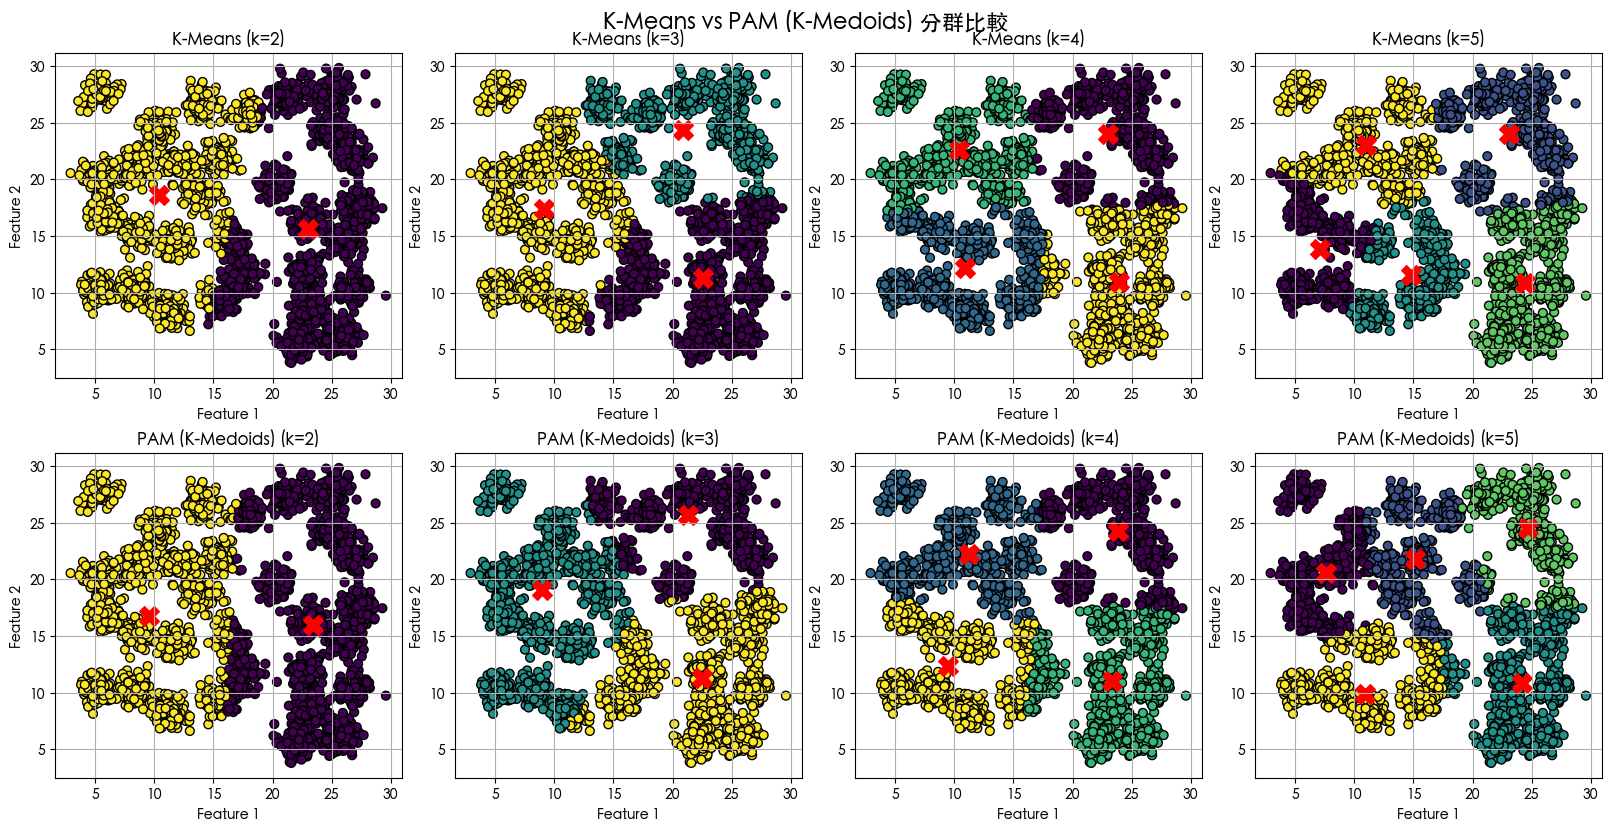

In [160]:
main_def.compare_kmeans_pam(data)

- 感覺也不太行

##### 不太確定畫一下displot

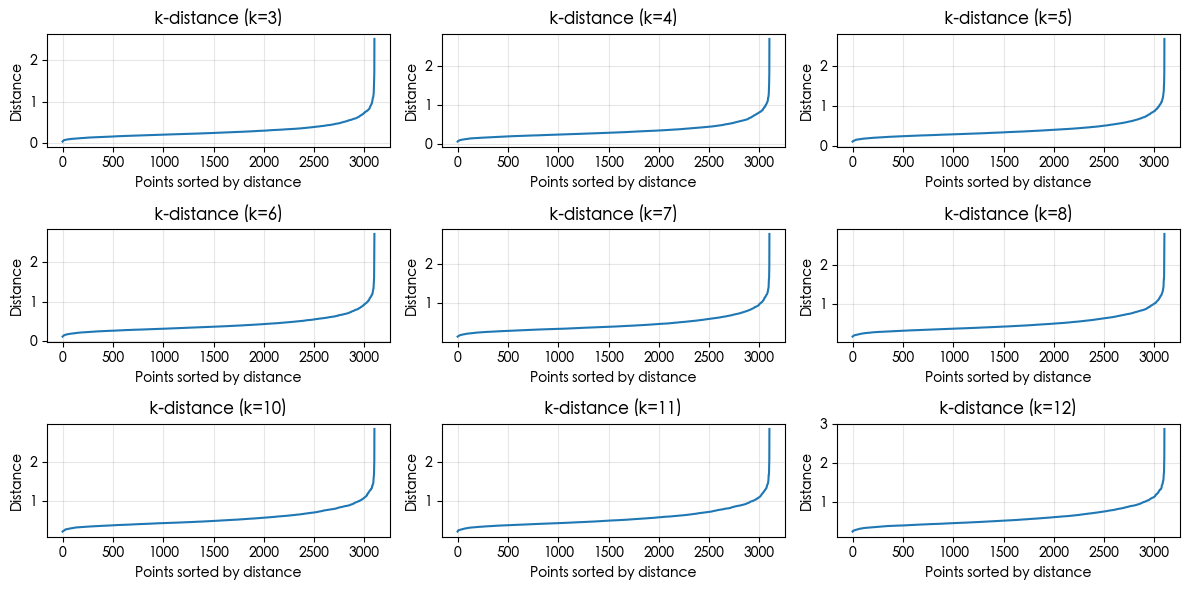

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import math
from sklearn.preprocessing import StandardScaler

# 你已有的資料矩陣：data (np.array 或 pd.DataFrame.values)
# 例如：data = df[['x','y']].values
ks = [3, 4, 5, 6, 7, 8 , 10 , 11 , 12]

# 排版：每列 3 張子圖
ncols = 3
nrows = math.ceil(len(ks) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6), squeeze=False)
axes = axes.ravel()

for idx, k in enumerate(ks):
    # 排除自己：設 n_neighbors=k+1，取第 k 個距離（0 是自己，1..k 是前 k 個鄰居）
    nbrs = NearestNeighbors(n_neighbors=k+1)
    nbrs.fit(data)
    distances, indices = nbrs.kneighbors(data)

    k_dist = distances[:, k]          # 到第 k 近鄰的距離
    k_dist_sorted = np.sort(k_dist)   # 排序後畫 elbow

    ax = axes[idx]
    ax.plot(k_dist_sorted)
    ax.set_title(f'k-distance (k={k})')
    ax.set_xlabel('Points sorted by distance')
    ax.set_ylabel('Distance')
    ax.grid(True, alpha=0.3)

# 把多餘的子圖框去掉
for j in range(len(ks), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Estimated number of clusters: 7
Estimated number of noise points: 12


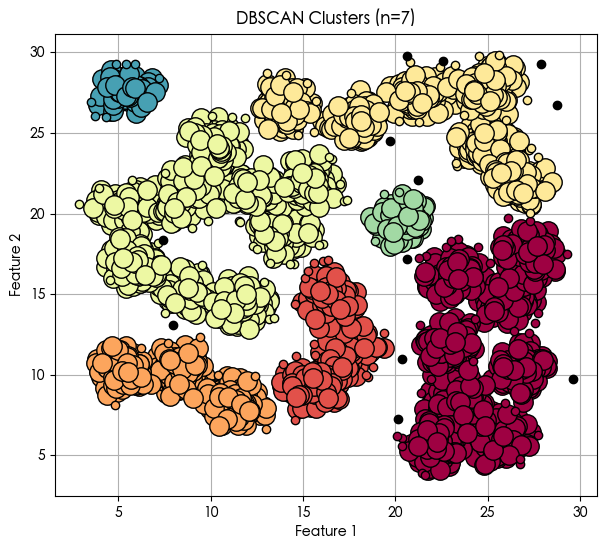

In [166]:
db, labels, X = main_def.run_dbscan(data, eps=1., min_samples=10, scale=False)
main_def.plot_dbscan_clusters(db, labels, X)


- 這邊我就沒有用標準化 感覺不用效果比較好, 因為沒差太多

#### 分群演算法觀察總結

##### Hierarchical Clustering
- 沒有這麼好用 因為蠻多資料的型態感覺不太符合

##### K-Means
- 感覺其實還可以但最後一個表現就沒有這麼好

##### DBSCAN
- 感覺在各種表現都還不錯 只是需要自己挑參數


<hr>
<hr>

#### 第二題

In [255]:
import numpy as np
X = np.loadtxt("hw1q2_data.txt")   # 預設以空白分隔
print(X.shape)  # 期待 (40, 1000)
X = X.T
print(X.shape)

(1000, 40)
(40, 1000)


In [256]:
np.isnan(X).sum()

0

In [257]:
from sklearn.preprocessing import StandardScaler

# 建立 StandardScaler 物件
scaler = StandardScaler()

# 標準化資料
X_std = scaler.fit_transform(X)

print(X_std.shape)


(40, 1000)


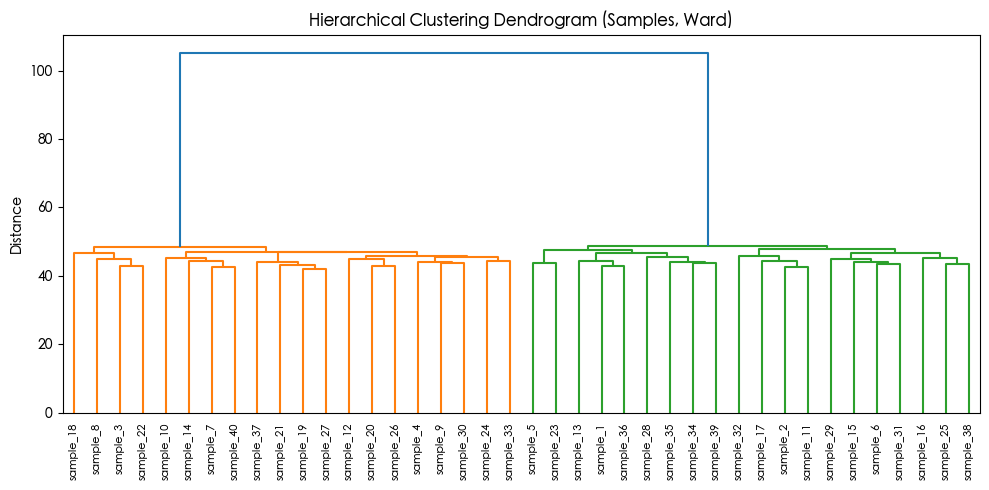

In [258]:
# ============ 3) 樣本階層式分群（Ward + Euclidean）===========
n_samples, n_genes = X.shape
link = linkage(X, method="ward", metric="euclidean")

plt.figure(figsize=(10, 5))
dendro = dendrogram(link, labels=[f"sample_{i+1}" for i in range(n_samples)], leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Samples, Ward)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

**a**
- 因為在expression values只要是越高就代表在這一千維度的世界中他們可以很明顯可以分成兩群 雖然沒辦法畫出來

In [259]:
from scipy.cluster.hierarchy import fcluster
import numpy as np
import pandas as pd


k = 2  # 想要的群數
labels = fcluster(link, t=k, criterion="maxclust")
print(pd.Series(labels).value_counts().sort_index())

1    20
2    20
Name: count, dtype: int64


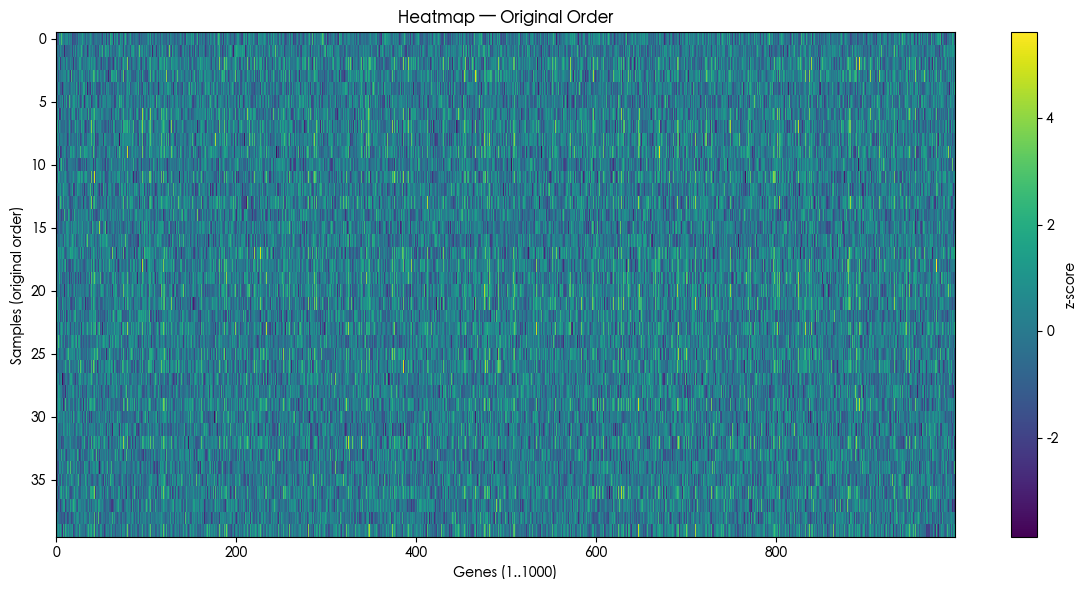

In [260]:
plt.figure(figsize=(12, 6))
plt.imshow(X , aspect="auto", interpolation="nearest", cmap="viridis")
plt.colorbar(label="z-score")
plt.xlabel("Genes (1..1000)")
plt.ylabel("Samples (original order)")
plt.title("Heatmap — Original Order")
plt.tight_layout()
plt.show()

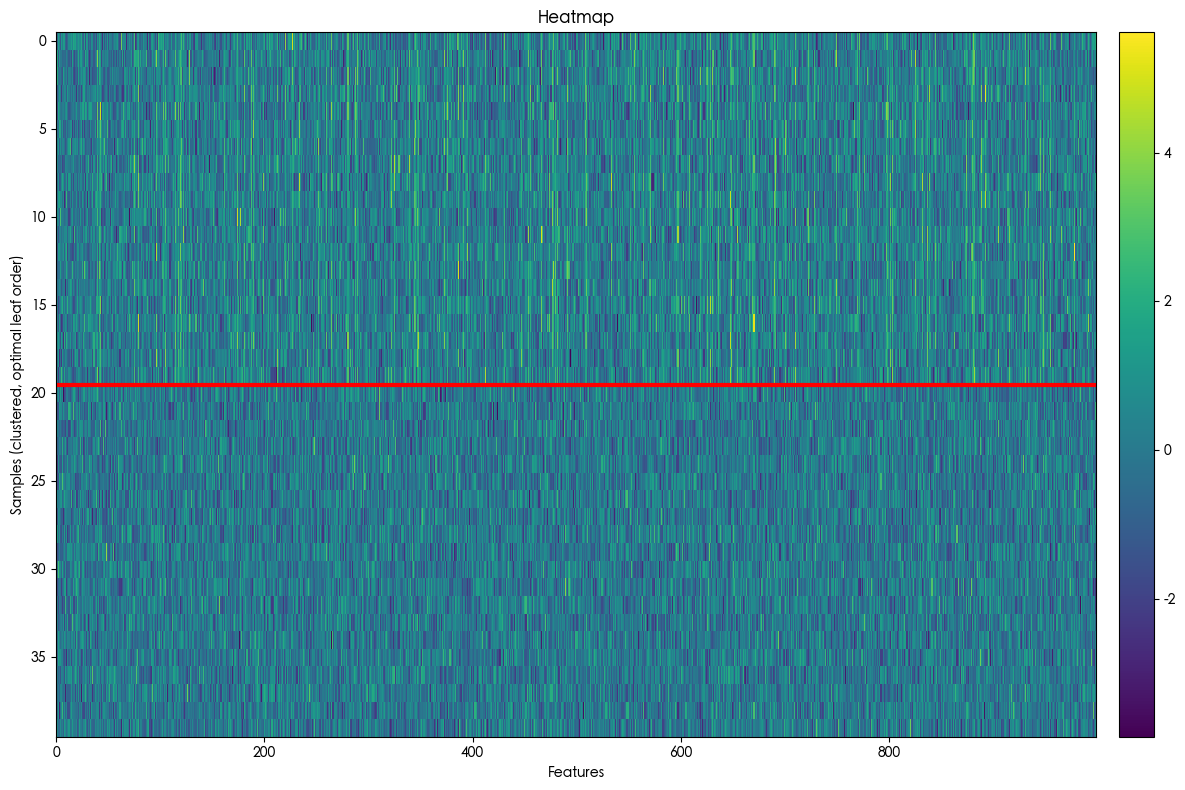

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, optimal_leaf_ordering, leaves_list
from scipy.spatial.distance import pdist

# 2) 用歐式距離生成 condensed 距離向量，Ward 必須搭配歐式距離
D = pdist(X, metric='euclidean')

# 3) linkage 與最優葉序
Z = linkage(D, method='ward')
Z = optimal_leaf_ordering(Z, D)

# 4) 依最優葉序取得樣本順序
row_order = leaves_list(Z)

# 5) 取 2 群（在最優葉序的 Z 上做即可；做在 Z 或原 Z 其實分群結果相同）
labels = fcluster(Z, t=2, criterion='maxclust')

# 6) 依葉序重排，再依群標籤做穩定排序（mergesort 保持葉序內相對次序）
X_row = X[row_order, :]
labels_row = labels[row_order]
idx = np.argsort(labels_row, kind='mergesort')

X_sorted = X_row[idx, :]
labels_sorted = labels_row[idx]

# 7) 繪圖
plt.figure(figsize=(12, 8))
im = plt.imshow(X_sorted, aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Features")
plt.ylabel("Samples (clustered, optimal leaf order)")
plt.title("Heatmap")
plt.colorbar(im, fraction=0.046, pad=0.02)

# （選配）在兩群之間畫一條分隔線
split_at = np.searchsorted(np.sort(labels_sorted), labels_sorted.max(), side='left')
if 0 < split_at < len(labels_sorted):
    plt.hlines(split_at - 0.5, xmin=-0.5, xmax=X_sorted.shape[1]-0.5, linewidth=3 , colors='red')

plt.tight_layout()
plt.show()


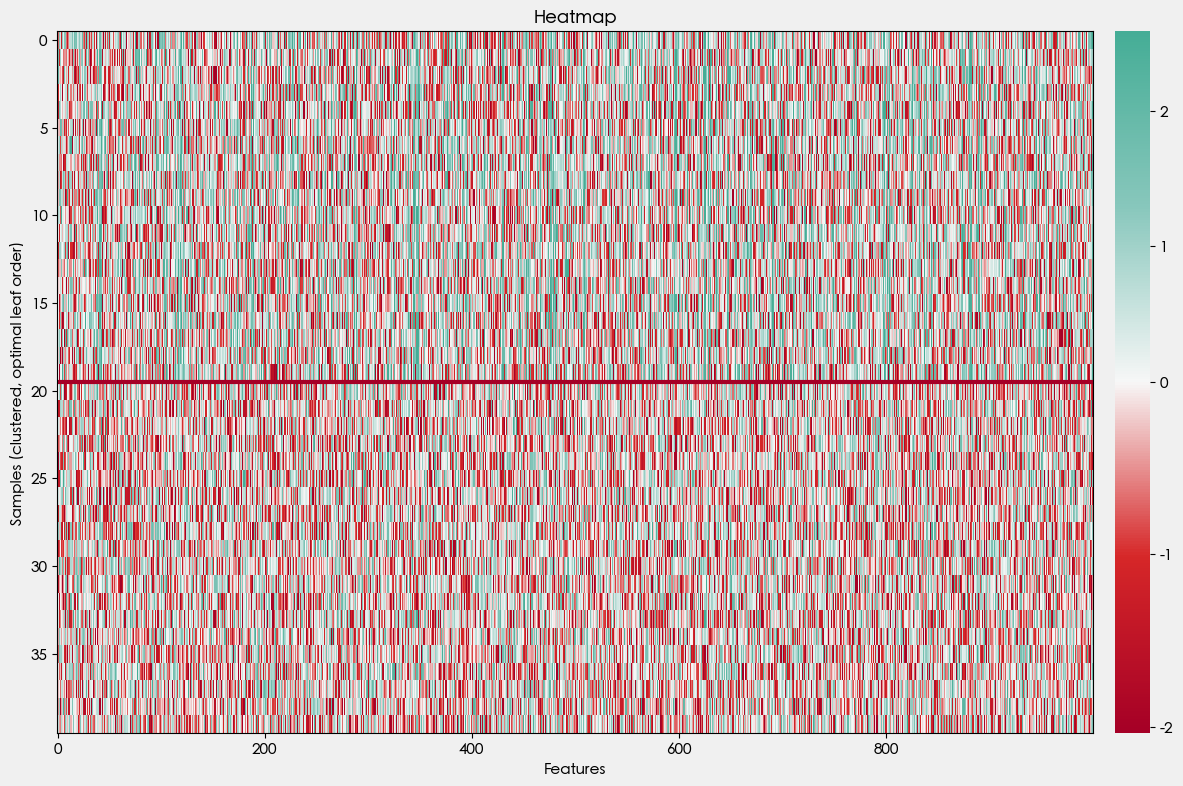

In [265]:
# 7) 繪圖（使用你的配色）

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# --- 你的配色 ---
PRIMARY = "#A50026"   # Deep Crimson
NEG1    = "#D62728"   # Negative
MID     = "#F7F7F7"   # Midpoint (neutral)
POS1    = "#88C7BC"   # Positive
POS2    = "#45AD96"   # Cool Teal (extreme positive)
BG      = "#F0F0F0"   # Light Gray background

# 發散色盤：負→中→正
cmap = LinearSegmentedColormap.from_list(
    "custom_diverging",
    [PRIMARY, NEG1, MID, POS1, POS2],
    N=256
)

# 以 0 為中心做標準化；兩端用分位數避免極端值壓縮色階
vmin = np.percentile(X_sorted, 2)
vmax = np.percentile(X_sorted, 98)
# 若資料已標準化（建議用 X_std_sorted），可固定範圍，例如 vmin=-2.5, vmax=2.5
norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)

plt.figure(figsize=(12, 8), facecolor=BG)
ax = plt.gca()
ax.set_facecolor(BG)

im = plt.imshow(X_sorted, aspect="auto", interpolation="nearest", cmap=cmap, norm=norm)
plt.xlabel("Features")
plt.ylabel("Samples (clustered, optimal leaf order)")
plt.title("Heatmap")

cb = plt.colorbar(im, fraction=0.046, pad=0.02)
cb.outline.set_visible(False)

# 在兩群之間畫分隔線（用主色）
split_at = np.searchsorted(np.sort(labels_sorted), labels_sorted.max(), side='left')
if 0 < split_at < len(labels_sorted):
    plt.hlines(split_at - 0.5, xmin=-0.5, xmax=X_sorted.shape[1]-0.5, linewidth=3, colors=PRIMARY)

plt.tight_layout()
plt.show()


**b**
- 其實在沒有劃分前heatmap是很難看出來的
- 劃分後可以看出來前二十個明顯偏高


In [222]:
X.shape
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 建立 StandardScaler 物件
scaler = StandardScaler()

# 標準化資料
X_std = scaler.fit_transform(X)

print(X_std.shape)


(40, 1000)


In [224]:
k = 2

km = KMeans(n_clusters=k, n_init="auto", random_state=42)
labels = km.fit_predict(X_std)


In [225]:
sizes = pd.Series(labels, name="cluster").value_counts().sort_index()
print("每群筆數：")
print(sizes)

每群筆數：
cluster
0    20
1    20
Name: count, dtype: int64


* 其實這樣也可以看出來但是這是在我已經知道群數的狀況下才這麼準

- 假如我改成下面這樣就感覺很不準(假設我不知道群數)

In [230]:
k = 3

km = KMeans(n_clusters=k, n_init="auto", random_state=42)
labels = km.fit_predict(X_std)

size = pd.Series(labels , name = 'cluster').value_counts()
print(size)

cluster
0    20
1    17
2     3
Name: count, dtype: int64


- 像這樣就會變得很詭異

- 但還是有辦法達成目標

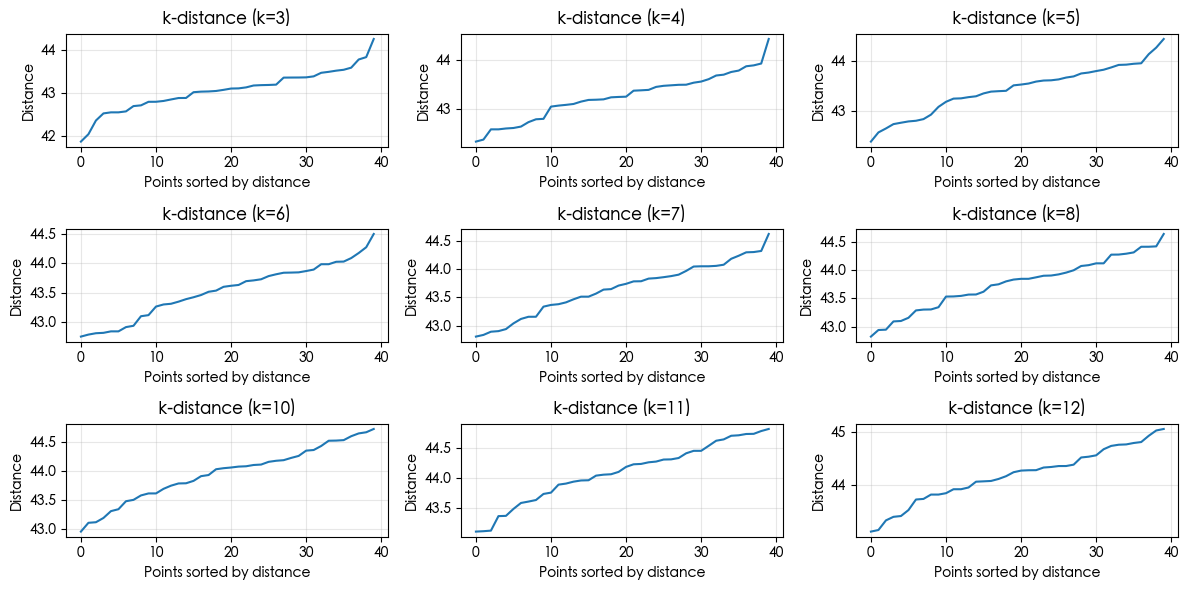

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import math
from sklearn.preprocessing import StandardScaler

# 你已有的資料矩陣：data (np.array 或 pd.DataFrame.values)
# 例如：data = df[['x','y']].values
ks = [3, 4, 5, 6, 7, 8 , 10 , 11 , 12]

data = X_std

# 排版：每列 3 張子圖
ncols = 3
nrows = math.ceil(len(ks) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 6), squeeze=False)
axes = axes.ravel()

for idx, k in enumerate(ks):
    # 排除自己：設 n_neighbors=k+1，取第 k 個距離（0 是自己，1..k 是前 k 個鄰居）
    nbrs = NearestNeighbors(n_neighbors=k+1)
    nbrs.fit(data)
    distances, indices = nbrs.kneighbors(data)

    k_dist = distances[:, k]          # 到第 k 近鄰的距離
    k_dist_sorted = np.sort(k_dist)   # 排序後畫 elbow

    ax = axes[idx]
    ax.plot(k_dist_sorted)
    ax.set_title(f'k-distance (k={k})')
    ax.set_xlabel('Points sorted by distance')
    ax.set_ylabel('Distance')
    ax.grid(True, alpha=0.3)

# 把多餘的子圖框去掉
for j in range(len(ks), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [232]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

# 你可調參：eps（鄰域半徑）、min_samples（核心點門檻）
db = DBSCAN(eps=44, min_samples=12).fit(X_std)
labels = db.labels_                 # -1 代表（未分到任何群）#但是下面其實都有分到沒有邊邊的那些

# 1) 各群筆數（含 -1）
sizes = pd.Series(labels, name="cluster").value_counts().sort_index()
print("每群筆數（含 -1=噪點）:")
print(sizes)

每群筆數（含 -1=噪點）:
cluster
0    20
1    20
Name: count, dtype: int64


- 其實效果感覺挺不錯的

**其實這三種應該都是可以的因為這組數據兩群挺明顯的**

<hr>
<hr>

In [234]:
import numpy as np

# 1) 讀檔
# 若檔案沒有標題且每列 784 個像素
data = np.loadtxt("hw1q3_handdigits.csv", delimiter=",")

In [239]:
idx = 1002
row = data[idx]
img = row.reshape(28,28)


最小 SSE: 25506738455.03（seed=25）
最大 SSE: 25809364829.50（seed=95）


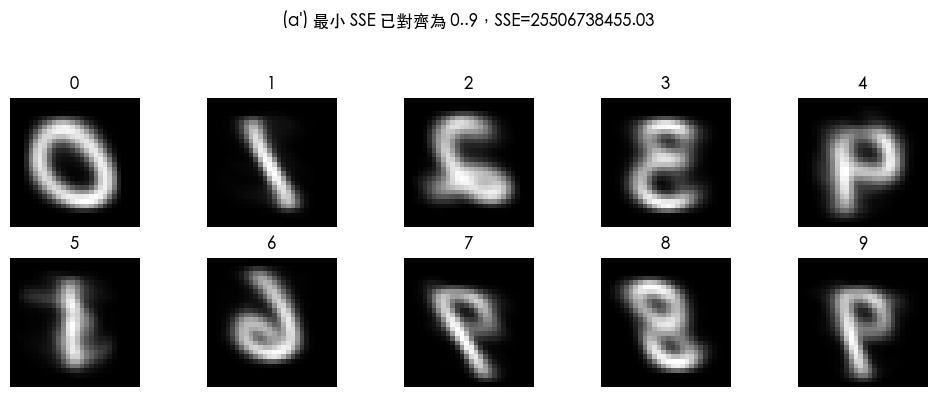

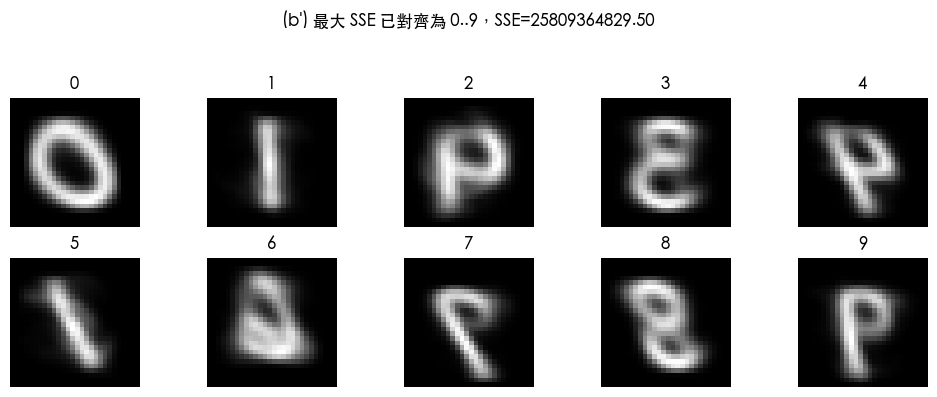

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from IPython.display import display
from scipy.optimize import linear_sum_assignment

# ===== 讀檔 =====
data = np.loadtxt("hw1q3_handdigits.csv", delimiter=",")
n_samples = data.shape[0]
assert data.shape[1] == 784

# ===== 建真實標籤：1..9 各 1000，最後 1000 為 0 =====
true_labels = np.zeros(n_samples, dtype=int)
for i in range(n_samples):
    block = i // 1000
    true_labels[i] = 0 if block == 9 else block + 1

# ===== 多次 KMeans =====
n_clusters = 10
n_runs = 100
runs = []
for seed in range(n_runs):
    km = KMeans(n_clusters=n_clusters, init="k-means++", n_init=1,
                random_state=seed, max_iter=300)
    km.fit(data)
    runs.append({
        "seed": seed,
        "sse": km.inertia_,
        "centers": km.cluster_centers_,
        "labels": km.labels_
    })

best = min(runs, key=lambda r: r["sse"])
worst = max(runs, key=lambda r: r["sse"])
print(f"最小 SSE: {best['sse']:.2f}（seed={best['seed']}）")
print(f"最大 SSE: {worst['sse']:.2f}（seed={worst['seed']}）")

# ===== 視覺化工具 =====
def show_centers(centers, title):
    plt.figure(figsize=(10, 4))
    plt.suptitle(title)
    for k in range(n_clusters):
        ax = plt.subplot(2, 5, k + 1)
        img = centers[k].reshape(28, 28)[:, ::-1]
        ax.imshow(img, cmap="gray", interpolation="nearest")
        ax.set_title(f"{k}")
        ax.axis("off")
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# ===== 對齊函式：把群號重編碼成 0..9，並重排中心 =====
def align_run(labels, centers, true_labels, n_clusters=10):
    # 建 conf[true_digit, cluster]
    conf = np.zeros((10, n_clusters), dtype=int)
    for d in range(10):
        idx = np.where(true_labels == d)[0]
        counts = np.bincount(labels[idx], minlength=n_clusters)
        conf[d, :] = counts

    # 匈牙利法：最大化命中 → 最小化 -conf
    row_ind, col_ind = linear_sum_assignment(-conf)
    cluster_for_digit = np.empty(10, dtype=int)   # digit -> cluster
    cluster_for_digit[row_ind] = col_ind

    digit_of_cluster = np.empty(10, dtype=int)    # cluster -> digit
    for d, c in enumerate(cluster_for_digit):
        digit_of_cluster[c] = d

    # 重編碼 labels，重排中心
    aligned_labels = digit_of_cluster[labels]
    aligned_centers = np.zeros_like(centers)
    for d in range(10):
        aligned_centers[d] = centers[cluster_for_digit[d]]

    # 對齊後摘要
    conf_aligned = np.zeros((10, n_clusters), dtype=int)
    for d in range(10):
        idx = np.where(true_labels == d)[0]
        counts = np.bincount(aligned_labels[idx], minlength=n_clusters)
        conf_aligned[d, :] = counts

    rows = []
    for d in range(10):
        c = d
        tp = int(conf_aligned[d, c])
        cluster_size = int(np.sum(aligned_labels == c))
        purity = tp / cluster_size if cluster_size > 0 else 0.0
        recall = tp / 1000.0
        verdict = "成功" if (purity >= 0.8 and recall >= 0.8) else ("普通" if (purity >= 0.6 or recall >= 0.6) else "不佳")
        rows.append([d, c, tp, cluster_size, purity, recall, verdict])

    summary_aligned = pd.DataFrame(
        rows,
        columns=["digit", "cluster(=digit)", "tp_in_cluster", "cluster_size", "purity", "recall", "verdict"]
    ).sort_values(["purity", "recall"], ascending=[False, False]).reset_index(drop=True)

    return aligned_labels, aligned_centers, summary_aligned

# ===== 對齊「最小 SSE」並輸出 =====
best_aligned_labels, best_aligned_centers, best_summary_aligned = align_run(
    best["labels"], best["centers"], true_labels, n_clusters
)
show_centers(best_aligned_centers, f"(a') 最小 SSE 已對齊為 0..9，SSE={best['sse']:.2f}")
display(best_summary_aligned.style.format({"purity": "{:.3f}", "recall": "{:.3f}"}))

# ===== 對齊「最大 SSE」並輸出 =====
worst_aligned_labels, worst_aligned_centers, worst_summary_aligned = align_run(
    worst["labels"], worst["centers"], true_labels, n_clusters
)
show_centers(worst_aligned_centers, f"(b') 最大 SSE 已對齊為 0..9，SSE={worst['sse']:.2f}")
display(worst_summary_aligned.style.format({"purity": "{:.3f}", "recall": "{:.3f}"}))


**A**

- 假如以0.8為界感覺都沒有到特別好的
- 但是寬鬆一點除了那些較差的([3, 4, 5, 7, 8, 9])其他勉強接受

**B**
- 這會表現比較差因為SSE小代表集中
- 這會比較不集中
- 然後kmeans就是來找集中的東東

(c) 使用 true label centers 的 SSE = 25652564788.48
(a) 最佳 SSE = 25506738455.03


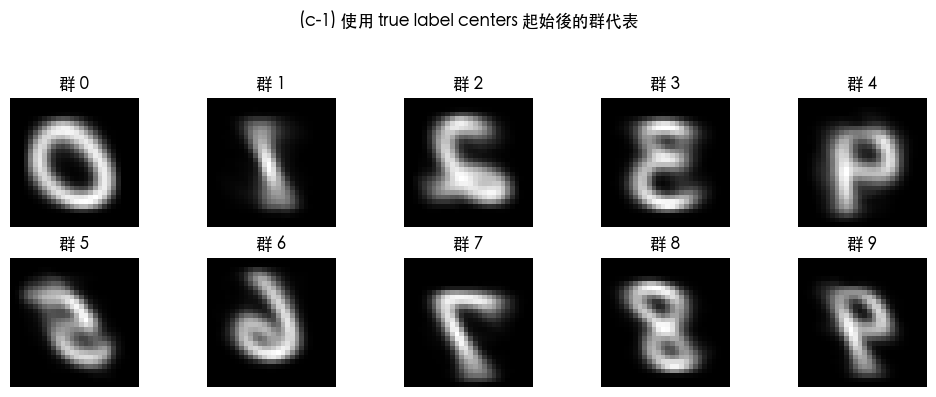

In [249]:
# (c) 計算 true label centers：每個數字的平均影像
true_centers = []
for d in range(10):
    idx = np.where(true_labels == d)[0]
    true_centers.append(data[idx].mean(axis=0))
true_centers = np.array(true_centers)  # 10x784

# 以 true label centers 為起始中心執行 K-means（不隨機）
km_true_init = KMeans(
    n_clusters=10,
    init=true_centers,
    n_init=1,       # 指定初始中心時只能 n_init=1
    max_iter=300,
    random_state=0
)
km_true_init.fit(data)

sse_true_init = km_true_init.inertia_
print(f"(c) 使用 true label centers 的 SSE = {sse_true_init:.2f}")
print(f"(a) 最佳 SSE = {best['sse']:.2f}")

# (c-1) 畫出群代表影像
plt.figure(figsize=(10, 4))
plt.suptitle("(c-1) 使用 true label centers 起始後的群代表")
for k in range(10):
    ax = plt.subplot(2, 5, k + 1)
    img = np.fliplr(km_true_init.cluster_centers_[k].reshape(28, 28))
    ax.imshow(img, cmap="gray", interpolation="nearest")

    ax.set_title(f"群 {k}")
    ax.axis("off")
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


- 我覺得有可能的關係和字的樣子有關 因為這些字假如是真的抓在很中心的點會是跟邊邊差很多的就是他也許不是全域最低點 這跟影像有關 但這只是我個人的猜測

- 但除了4感覺其他都抓到的不錯

被分錯到群2的『1』共有 2 筆
展示索引： [500, 866]
樣本 500 -> dist to center(1) = 2106.32, dist to center(2) = 1871.40
樣本 866 -> dist to center(1) = 2073.47, dist to center(2) = 1980.86


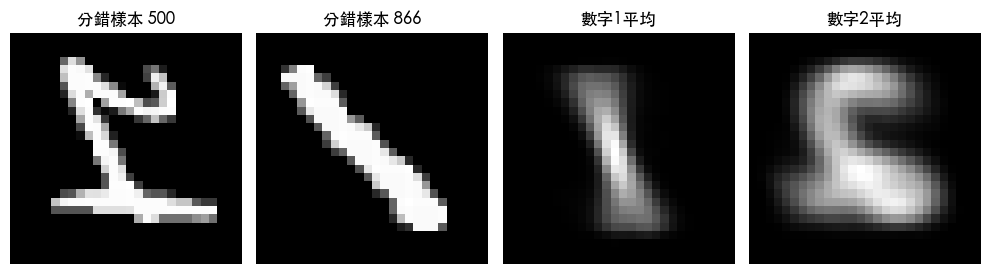

In [250]:
# 1) 找出：真實為 1，但被分到群 2 的索引
mis_idx = np.where((true_labels == 1) & (km_true_init.labels_ == 2))[0]
print(f"被分錯到群2的『1』共有 {len(mis_idx)} 筆")
sel = mis_idx[:2] if len(mis_idx) >= 2 else mis_idx  # 取前兩個（不足兩個就全取）
print("展示索引：", sel.tolist())

# 2) 計算這些樣本到「群2中心」與「群1中心」的距離作為參考
# 群索引與初始對應：中心 0..9 分別以數字 0..9 的平均初始化
center_1 = km_true_init.cluster_centers_[1]
center_2 = km_true_init.cluster_centers_[2]

for i in sel:
    x = data[i]
    d1 = np.linalg.norm(x - center_1)
    d2 = np.linalg.norm(x - center_2)
    print(f"樣本 {int(i)} -> dist to center(1) = {d1:.2f}, dist to center(2) = {d2:.2f}")

# 3) 畫圖：兩個被分錯的樣本 + 數字1平均 + 數字2平均
def show(img, ax, title):
    ax.imshow(img.reshape(28, 28)[:, ::-1], cmap="gray", interpolation="nearest")  # 左右翻轉以對齊 R 的顯示
    ax.set_title(title)
    ax.axis("off")

n_cols = 4
plt.figure(figsize=(10, 3))

# (a) 分錯的兩個樣本
for j, i in enumerate(sel):
    ax = plt.subplot(1, n_cols, j+1)
    show(data[i], ax, f"分錯樣本 {int(i)}")

# (b) 數字 1 與 2 的 true label centers
ax = plt.subplot(1, n_cols, len(sel)+1)
show(true_centers[1], ax, "數字1平均")

ax = plt.subplot(1, n_cols, len(sel)+2)
show(true_centers[2], ax, "數字2平均")

plt.tight_layout()
plt.show()

- 感覺會是因為他們跟2都有斜斜的那一個東東 而1的都是比較直直的所以相比較下來就會變成選擇２